In [2]:
# for data
import pandas as pd
import numpy as np

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

## 2. The Data

#### 2.1 Dataset Understanding

In [3]:
dtf = pd.read_csv('Data_Negara_HELP.csv')
dtf

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
dtf.columns.to_list()

['Negara',
 'Kematian_anak',
 'Ekspor',
 'Kesehatan',
 'Impor',
 'Pendapatan',
 'Inflasi',
 'Harapan_hidup',
 'Jumlah_fertiliti',
 'GDPperkapita']

In [5]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [6]:
dtf.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [7]:
dtf.shape

(167, 10)

In [8]:
dtf.isna().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

### 2.2 EDA Part 1

##### Multivariate Analysis

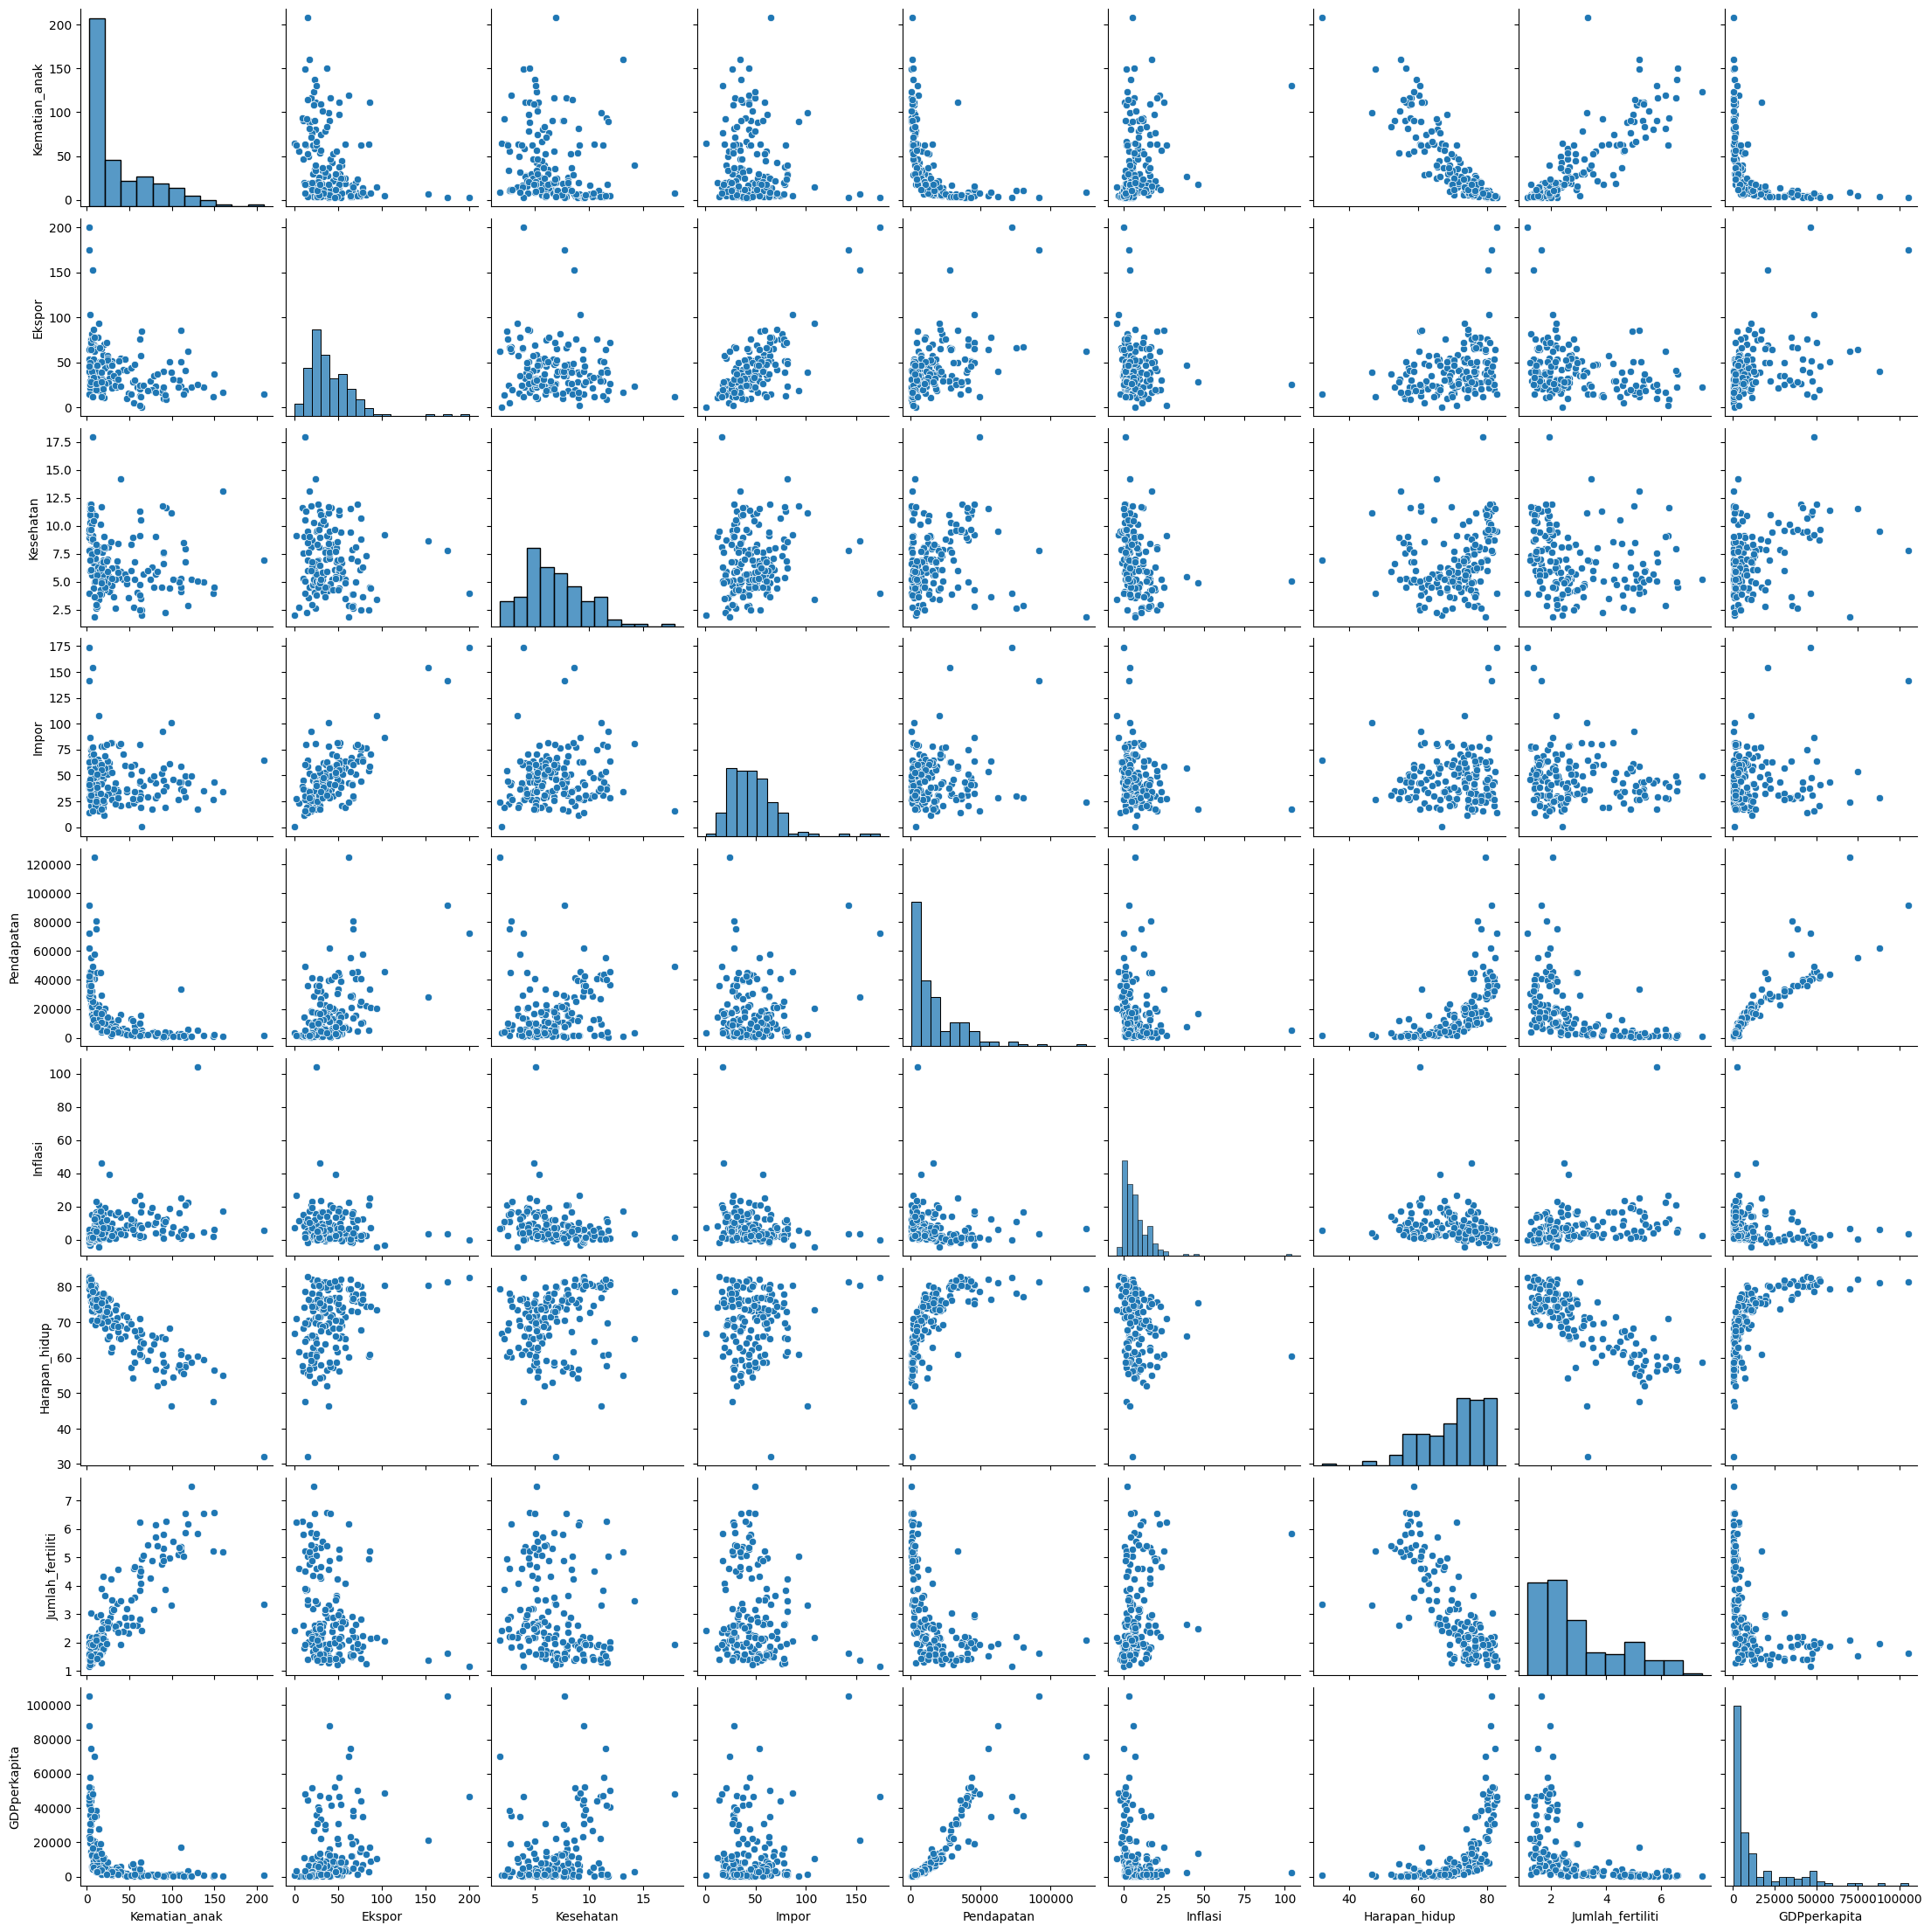

In [9]:
sns.pairplot(dtf, diag_kind='hist')
plt.show()

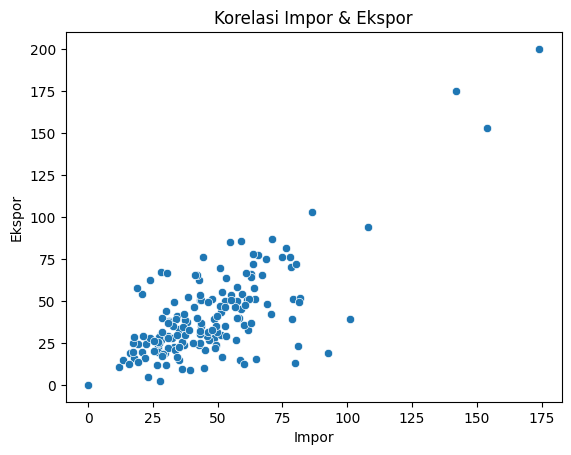

In [10]:
fig,ax = plt.subplots()
sns.scatterplot(data=dtf, x='Impor', y='Ekspor')
plt.title('Korelasi Impor & Ekspor')
plt.show()

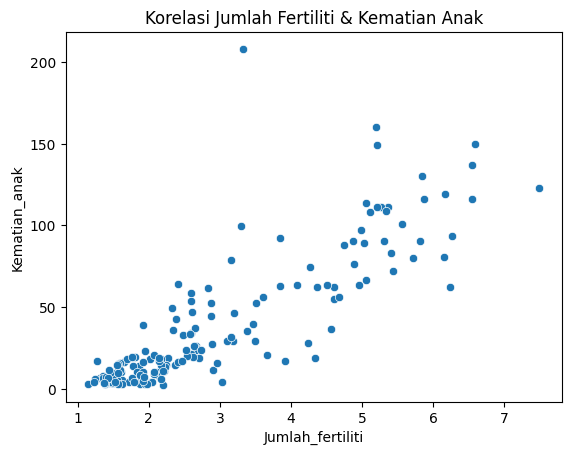

In [11]:
fig,ax = plt.subplots()
sns.scatterplot(data=dtf, x='Jumlah_fertiliti', y='Kematian_anak')
plt.title('Korelasi Jumlah Fertiliti & Kematian Anak')
plt.show()

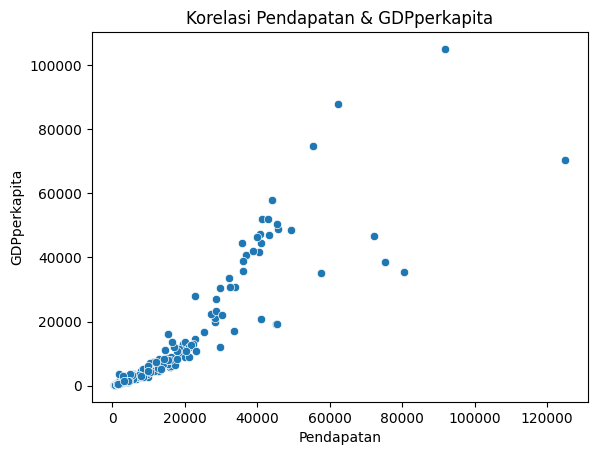

In [12]:
fig,ax = plt.subplots()
sns.scatterplot(data=dtf, x='Pendapatan', y='GDPperkapita')
plt.title('Korelasi Pendapatan & GDPperkapita')
plt.show()

### 2.3 Feature Selection

##### Mencari nilai korelasinya yang tinggi dari ketiga plot diatas

In [13]:
correlation = dtf[['Ekspor','Impor','Kematian_anak','Jumlah_fertiliti','GDPperkapita','Pendapatan']]
correlation.corr('pearson')

,Ekspor,Impor,Kematian_anak,Jumlah_fertiliti,GDPperkapita,Pendapatan
Ekspor,1.000000,0.737381,-0.318093,-0.320011,0.418725,0.516784
Impor,0.737381,1.000000,-0.127211,-0.159048,0.115498,0.122406
Kematian_anak,-0.318093,-0.127211,1.000000,0.848478,-0.483032,-0.524315
Jumlah_fertiliti,-0.320011,-0.159048,0.848478,1.000000,-0.454910,-0.501840
GDPperkapita,0.418725,0.115498,-0.483032,-0.454910,1.000000,0.895571
Pendapatan,0.516784,0.122406,-0.524315,-0.501840,0.895571,1.000000


##### menggunakan plot heatmap

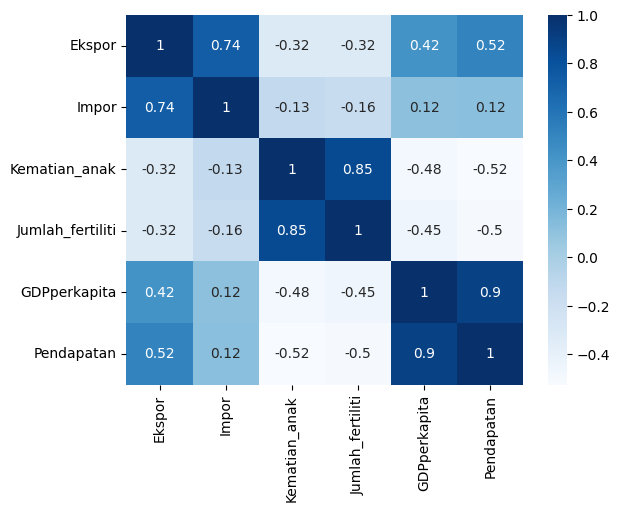

In [14]:
sns.heatmap(correlation.corr('pearson'), cmap='Blues', annot=True)
plt.show()

##### menggunakan data Pendapatan & GDPperkapita dengan nilai korelasi tertinggi 0.9 hampir mendekati 1

### 2.4 Data Cleaning

##### Missing Values

In [15]:
dtf.isnull().sum()

Negara              0
Kematian_anak       0
Ekspor              0
Kesehatan           0
Impor               0
Pendapatan          0
Inflasi             0
Harapan_hidup       0
Jumlah_fertiliti    0
GDPperkapita        0
dtype: int64

In [16]:
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


##### Checking Outliers

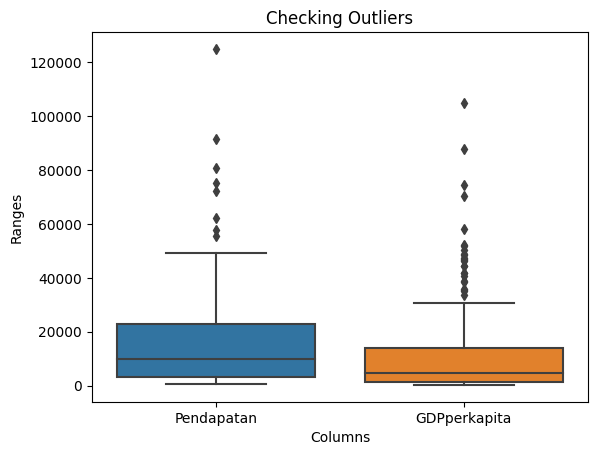

In [17]:
kolom = ['Pendapatan','GDPperkapita']
sns.boxplot(data=dtf[kolom])
plt.title('Checking Outliers')
plt.xlabel('Columns')
plt.ylabel('Ranges')
plt.show()

##### Handling Outliers

In [18]:
dtf_korelasi = dtf[['Pendapatan','GDPperkapita']]

In [19]:
dtf_korelasi

,Pendapatan,GDPperkapita
0,1610,553
1,9930,4090
2,12900,4460
3,5900,3530
4,19100,12200
...,...,...
162,2950,2970
163,16500,13500
164,4490,1310
165,4480,1310


In [20]:
dtf_korelasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Pendapatan    167 non-null    int64
 1   GDPperkapita  167 non-null    int64
dtypes: int64(2)
memory usage: 2.7 KB


In [21]:
# function utk cari outliers
def cari_outlier(df) :
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    hasil = df[((df<=(Q1-1.5*IQR)) | (df>=(Q3+1.5*IQR)))]
    return hasil

In [22]:
print(cari_outlier(dtf_korelasi['Pendapatan']).count())
print(cari_outlier(dtf_korelasi['GDPperkapita']).count())

8
25


In [23]:
# function hapus outliers
def hapus_outlier(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3-Q1
    hapus = df[~((df<=(Q1-1.5*IQR)) | (df>=(Q3+1.5*IQR)))]
    return hapus

In [24]:
dtf_clean_outliers = hapus_outlier(dtf_korelasi[['Pendapatan','GDPperkapita']])
dtf_clean_outliers.dropna(axis=0, inplace=True)
dtf_clean_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142 entries, 0 to 166
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pendapatan    142 non-null    float64
 1   GDPperkapita  142 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [25]:
dtf_clean_outliers

,Pendapatan,GDPperkapita
0,1610.0,553.0
1,9930.0,4090.0
2,12900.0,4460.0
3,5900.0,3530.0
4,19100.0,12200.0
...,...,...
162,2950.0,2970.0
163,16500.0,13500.0
164,4490.0,1310.0
165,4480.0,1310.0


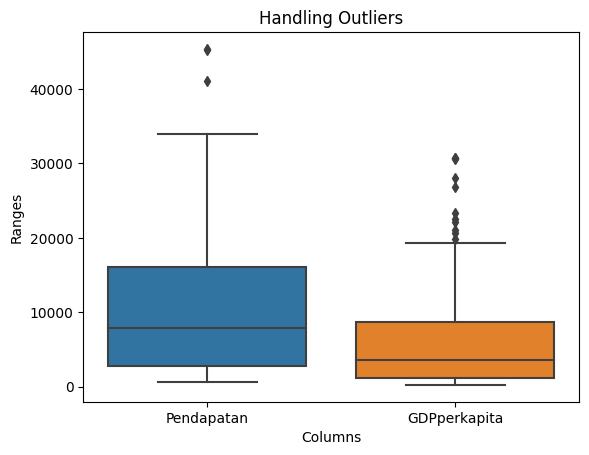

In [26]:
kolom = ['Pendapatan','GDPperkapita']
sns.boxplot(data=dtf_clean_outliers[kolom])
plt.title('Handling Outliers')
plt.xlabel('Columns')
plt.ylabel('Ranges')
plt.show()

In [27]:
print(cari_outlier(dtf_clean_outliers['Pendapatan']).count())
print(cari_outlier(dtf_clean_outliers['GDPperkapita']).count())

3
11


In [28]:
dtf_clean_outliers = hapus_outlier(dtf_clean_outliers[['Pendapatan','GDPperkapita']])
dtf_clean_outliers.dropna(axis=0, inplace=True)
dtf_clean_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129 entries, 0 to 166
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pendapatan    129 non-null    float64
 1   GDPperkapita  129 non-null    float64
dtypes: float64(2)
memory usage: 3.0 KB


In [29]:
dtf_clean_outliers

,Pendapatan,GDPperkapita
0,1610.0,553.0
1,9930.0,4090.0
2,12900.0,4460.0
3,5900.0,3530.0
4,19100.0,12200.0
...,...,...
162,2950.0,2970.0
163,16500.0,13500.0
164,4490.0,1310.0
165,4480.0,1310.0


In [30]:
print(cari_outlier(dtf_clean_outliers['Pendapatan']).count())
print(cari_outlier(dtf_clean_outliers['GDPperkapita']).count())

1
3


In [31]:
dtf_clean_outliers = hapus_outlier(dtf_clean_outliers[['Pendapatan','GDPperkapita']])
dtf_clean_outliers.dropna(axis=0, inplace=True)
dtf_clean_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126 entries, 0 to 166
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pendapatan    126 non-null    float64
 1   GDPperkapita  126 non-null    float64
dtypes: float64(2)
memory usage: 3.0 KB


In [32]:
print(cari_outlier(dtf_clean_outliers['Pendapatan']).count())
print(cari_outlier(dtf_clean_outliers['GDPperkapita']).count())

1
1


In [33]:
dtf_clean_outliers = hapus_outlier(dtf_clean_outliers[['Pendapatan','GDPperkapita']])
dtf_clean_outliers.dropna(axis=0, inplace=True)
dtf_clean_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 124 entries, 0 to 166
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Pendapatan    124 non-null    float64
 1   GDPperkapita  124 non-null    float64
dtypes: float64(2)
memory usage: 2.9 KB


In [34]:
print(cari_outlier(dtf_clean_outliers['Pendapatan']).count())
print(cari_outlier(dtf_clean_outliers['GDPperkapita']).count())


0
0


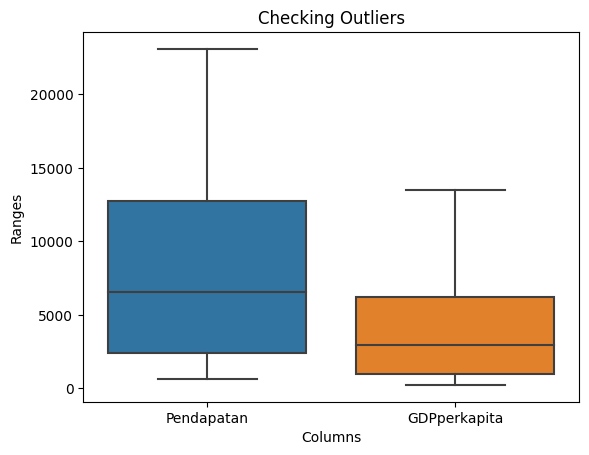

In [35]:
kolom = ['Pendapatan','GDPperkapita']
sns.boxplot(data=dtf_clean_outliers[kolom])
plt.title('Checking Outliers')
plt.xlabel('Columns')
plt.ylabel('Ranges')
plt.show()

### 2.5 EDA Part 2

##### Univariate Analysis

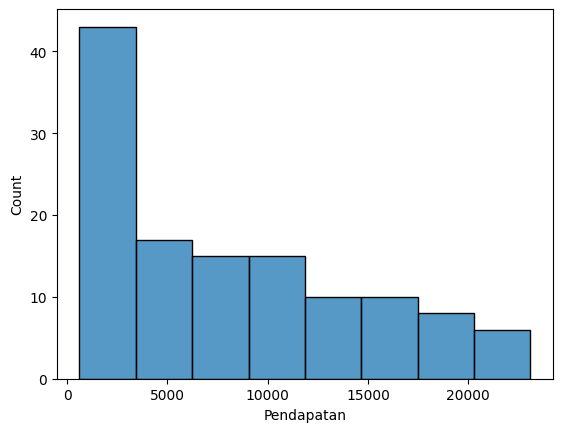

In [36]:
fig,ax = plt.subplots()
sns.histplot(data=dtf_clean_outliers, x='Pendapatan')
plt.show()

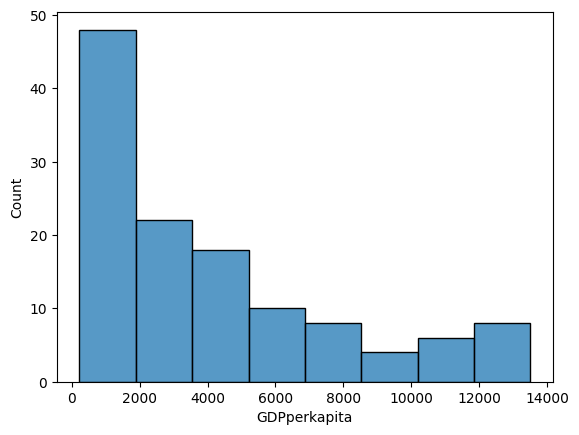

In [37]:
fig,ax = plt.subplots()
sns.histplot(data=dtf_clean_outliers, x='GDPperkapita')
plt.show()

##### Bivariate Analysis

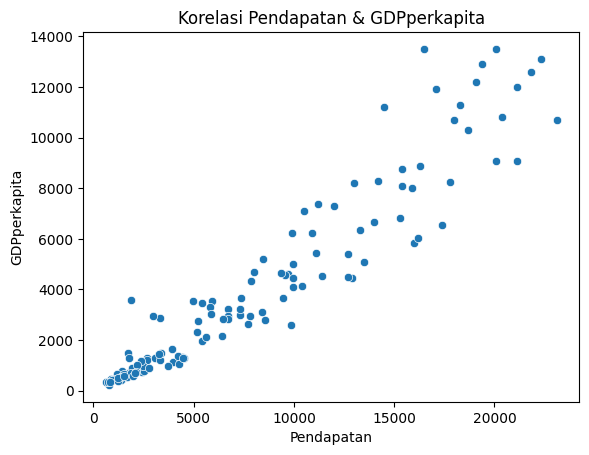

In [38]:
fig,ax = plt.subplots()
sns.scatterplot(data=dtf_clean_outliers, x='Pendapatan', y='GDPperkapita')
plt.title('Korelasi Pendapatan & GDPperkapita')
plt.show()

In [39]:
dtf_clean_outliers

,Pendapatan,GDPperkapita
0,1610.0,553.0
1,9930.0,4090.0
2,12900.0,4460.0
3,5900.0,3530.0
4,19100.0,12200.0
...,...,...
162,2950.0,2970.0
163,16500.0,13500.0
164,4490.0,1310.0
165,4480.0,1310.0


### 3. Clustering

##### scale the data

In [40]:
scaler = StandardScaler()
dtf_scaled = scaler.fit_transform(dtf_clean_outliers.astype(float))
dtf_scaled

array([[-1.02787098, -0.96515097],
       [ 0.29038314, -0.0036261 ],
       [ 0.76096183,  0.09695751],
       [-0.3481462 , -0.15586074],
       [ 1.74331465,  2.20105774],
       [ 1.67993705,  1.68454735],
       [-0.221391  , -0.24013349],
       [ 1.25213824,  0.47210716],
       [-0.89636245, -0.90942222],
       [ 1.28382704,  0.5237582 ],
       [-0.03442707,  0.0643358 ],
       [-0.99459774, -0.90942222],
       [-0.26575532, -0.52285496],
       [-0.42578376, -0.57722448],
       [ 0.2571099 ,  0.13773464],
       [ 0.82433943,  0.61074942],
       [ 1.01447224,  1.92921016],
       [ 1.14122744,  0.74395474],
       [-1.0563909 , -0.95917032],
       [-1.1619146 , -1.05268589],
       [-0.88368693, -0.90181048],
       [-0.86150477, -0.75936236],
       [-0.35923728, -0.2156672 ],
       [-1.14226755, -0.99423866],
       [-0.9771689 , -0.8716354 ],
       [ 1.79084786,  2.39135104],
       [ 0.22700554,  0.12414226],
       [ 0.44407382,  0.58356467],
       [-1.05955978,

##### Elbow Method

c:\Users\IB Janar Dana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\IB Janar Dana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\IB Janar Dana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\IB Janar Dana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

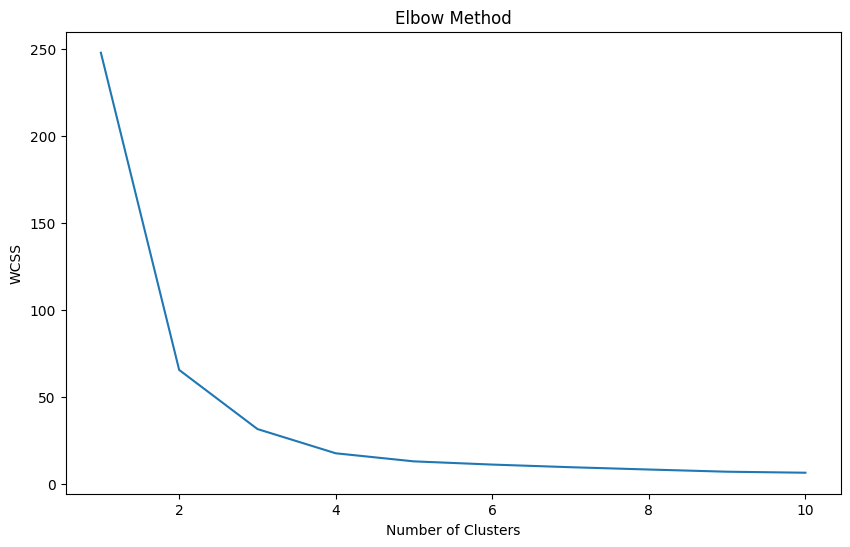

In [41]:
plt.figure(figsize=(10,6))
wcss = []
for i in range(1, 11) :
    kmeans = KMeans(n_clusters = i, init='k-means++', random_state=42)
    kmeans.fit(dtf_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
    
plt.show()

##### Silhouette Score Method

c:\Users\IB Janar Dana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\IB Janar Dana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\IB Janar Dana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\IB Janar Dana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 

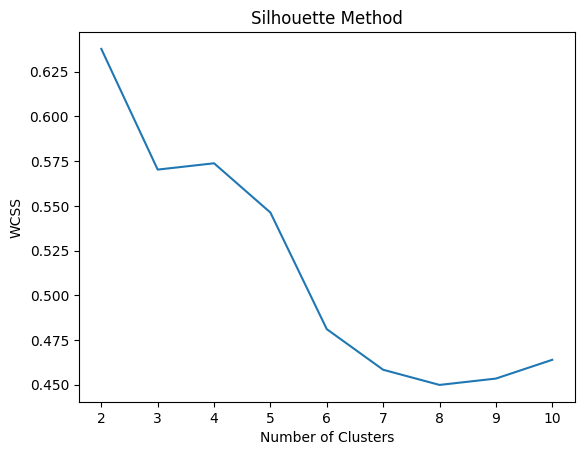

In [42]:
# Shilouette Score
data = []
k_list = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters = k).fit(dtf_scaled)
    cluster = kmeans.labels_
    data.append(silhouette_score(dtf_scaled, cluster, metric = 'euclidean'))
    k_list.append(k)

plt.plot(k_list,data)
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [43]:
kmeans = KMeans(n_clusters=4, random_state=42).fit(dtf_clean_outliers[['Pendapatan','GDPperkapita']])
labels = kmeans.labels_
dtf_clean_outliers['cluster_id'] = labels

c:\Users\IB Janar Dana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [44]:
labels

array([2, 0, 3, 0, 1, 1, 0, 3, 2, 3, 0, 2, 0, 0, 0, 3, 3, 3, 2, 2, 2, 2,
       0, 2, 2, 1, 0, 3, 2, 2, 0, 3, 2, 1, 3, 0, 0, 0, 2, 0, 3, 2, 0, 2,
       3, 0, 2, 2, 0, 2, 1, 2, 0, 3, 3, 0, 0, 1, 2, 2, 2, 2, 1, 3, 2, 2,
       1, 3, 2, 2, 1, 3, 2, 2, 3, 2, 2, 0, 3, 0, 2, 2, 0, 2, 2, 0, 2, 3,
       0, 0, 0, 1, 1, 1, 2, 0, 2, 3, 1, 2, 2, 3, 0, 0, 2, 3, 2, 2, 3, 2,
       2, 0, 0, 1, 0, 2, 0, 1, 2, 2, 1, 2, 2, 2])

In [45]:
dtf_clean_outliers

,Pendapatan,GDPperkapita,cluster_id
0,1610.0,553.0,2
1,9930.0,4090.0,0
2,12900.0,4460.0,3
3,5900.0,3530.0,0
4,19100.0,12200.0,1
...,...,...,...
162,2950.0,2970.0,2
163,16500.0,13500.0,1
164,4490.0,1310.0,2
165,4480.0,1310.0,2


<Axes: xlabel='cluster_id'>

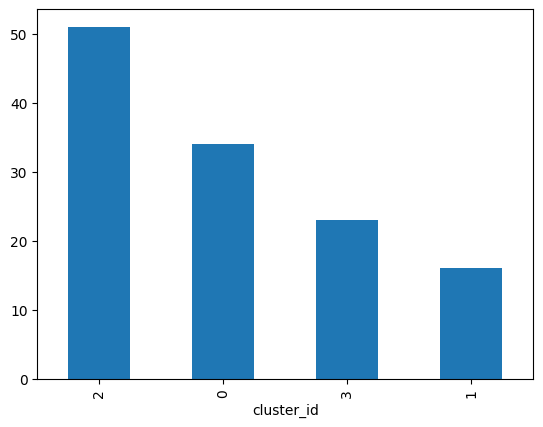

In [46]:
# plot jumlah cluster
hist = pd.value_counts(dtf_clean_outliers.cluster_id)
hist.plot(kind='bar')

In [47]:
dtf['cluster_id'] = dtf_clean_outliers['cluster_id']
dtf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Negara            167 non-null    object 
 1   Kematian_anak     167 non-null    float64
 2   Ekspor            167 non-null    float64
 3   Kesehatan         167 non-null    float64
 4   Impor             167 non-null    float64
 5   Pendapatan        167 non-null    int64  
 6   Inflasi           167 non-null    float64
 7   Harapan_hidup     167 non-null    float64
 8   Jumlah_fertiliti  167 non-null    float64
 9   GDPperkapita      167 non-null    int64  
 10  cluster_id        124 non-null    float64
dtypes: float64(8), int64(2), object(1)
memory usage: 14.5+ KB


In [48]:
dtf.head(15)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_id
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553,2.0
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0.0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,3.0
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530,0.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,1.0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,1.0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0.0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,NaN
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,NaN
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,3.0


### Recommendation

1. Country Cluster to focus is Green Color with cluster_id 2.0

C:\Users\IB Janar Dana\AppData\Local\Temp\ipykernel_11396\2967130960.py:2: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.scatterplot(data=dtf, x='Pendapatan', y='GDPperkapita', hue='cluster_id', palette=sns.color_palette('bright'))


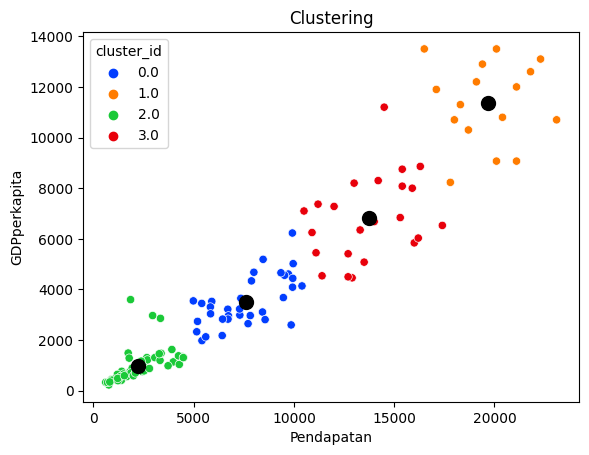

In [49]:
fig,ax = plt.subplots()
sns.scatterplot(data=dtf, x='Pendapatan', y='GDPperkapita', hue='cluster_id', palette=sns.color_palette('bright'))
centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100)
plt.title('Clustering')
plt.show()

In [50]:
countryCluster = dtf[dtf.cluster_id==2.0]
countryCluster.head(10)

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_id
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,2.0
12,Bangladesh,49.4,16.00,3.52,21.8,2440,7.140,70.4,2.33,758,2.0
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,2.0
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,2.0
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,2.0
27,Cambodia,44.4,54.10,5.68,59.5,2520,3.120,66.1,2.88,786,2.0
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,2.0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,2.0
32,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,2.0
36,Comoros,88.2,16.50,4.51,51.7,1410,3.870,65.9,4.75,769,2.0


In [51]:
countryCluster.shape

(51, 11)

In [52]:
countryCluster.describe()

,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_id
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0
mean,82.403922,25.994098,6.557843,45.297371,2238.882353,8.974608,61.125490,4.543333,982.627451,2.0
std,38.126862,14.960320,2.826281,21.137897,1117.114473,6.297593,7.238117,1.378236,665.532658,0.0
min,17.200000,0.109000,1.970000,0.065900,609.000000,0.885000,32.100000,1.270000,231.000000,2.0
25%,57.550000,15.650000,4.840000,29.800000,1400.000000,3.835000,57.400000,3.480000,557.500000,2.0
50%,80.300000,22.800000,5.690000,42.700000,1930.000000,7.640000,61.700000,4.870000,769.000000,2.0
75%,104.500000,36.100000,7.780000,55.000000,3005.000000,12.200000,66.150000,5.380000,1300.000000,2.0
max,208.000000,72.000000,14.200000,101.000000,4490.000000,26.500000,73.100000,7.490000,3600.000000,2.0


In [53]:
rata2_pendapatan = countryCluster['Pendapatan'].mean()
rata2_gdp = countryCluster['GDPperkapita'].mean()

lowerPendapatan_country = countryCluster['Pendapatan'] < rata2_pendapatan
lowerGdp_country = countryCluster['GDPperkapita'] < rata2_gdp

lower_country = countryCluster[(lowerPendapatan_country) & (lowerGdp_country)]
top5_lower = lower_country.sort_values(['Pendapatan','GDPperkapita']).head(5)

top_lower_gdp = top5_lower.sort_values(['GDPperkapita'])

2. Show which countries included in that cluster

In [54]:
top_lower_gdp

,Negara,Kematian_anak,Ekspor,Kesehatan,Impor,Pendapatan,Inflasi,Harapan_hidup,Jumlah_fertiliti,GDPperkapita,cluster_id
26,Burundi,93.6,8.92,11.60,39.2,764,12.30,57.7,6.26,231,2.0
88,Liberia,89.3,19.10,11.80,92.6,700,5.47,60.8,5.02,327,2.0
37,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.80,57.5,6.54,334,2.0
112,Niger,123.0,22.20,5.16,49.1,814,2.55,58.8,7.49,348,2.0
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.01,47.5,5.21,446,2.0


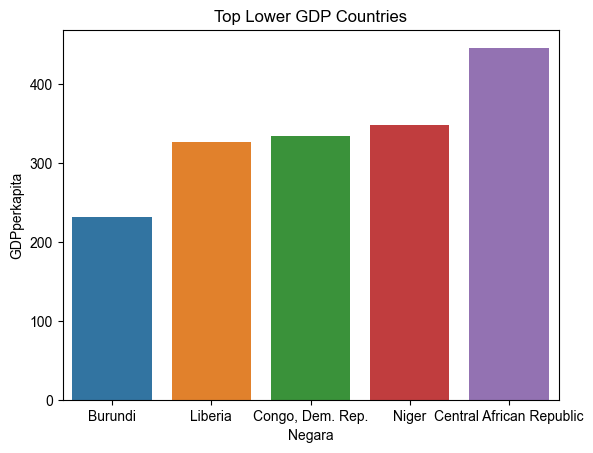

In [55]:
fig,ax = plt.subplots()
sns.barplot(data=top_lower_gdp, x='Negara', y='GDPperkapita')
sns.set_style('whitegrid')
plt.title('Top Lower GDP Countries')
plt.show()

3. Best countries to receive help is Burundi